In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import preprocessing
from sklearn import svm, tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

# Retrieve data function

Retrieving data from csv, adding columns, changing the datatype of categorial columns and loading it into pandas dataframe

In [22]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

def get_data():
    columns = ["checking_ac", "duration", "credit_history", "purpose", "amount", "saving_ac",
           "employment_status", "installment_rate", 'personal_status_sex', "debtor_guarantor", "residence_since",
          "property", "age", "installment_plan", "housing", "existing_credits", "job", "liable_count", "telephone",
          "foreign_worker", "target"]
    df = pd.read_csv("../data/german.data2.csv", delimiter=' ', index_col=False, names=columns)
    
    cat_cols = []
    for col in df.columns:
        if len(df[col].unique()) < 11:
            cat_cols.append(col)
            df[col]=df[col].astype('category')
    return df

def dist_plot(df, col_name):
    plt.title(i)
    sns.distplot(df[col_name])
    plt.show()
    
def count_plot(df, col_name):
    plt.title(i)
    sns.countplot(df[col_name])
    plt.show()
    
def count_cat_plot(df, col_name):
    sns.countplot(x=col_name, hue="target", data=df, dodge=False)
    plt.show()

def qq_plot(df, col_name):
    stats.probplot(df[col_name], dist="norm", plot=plt)
    plt.title(col_name)
    plt.show()
    
def box_plot(df, col_name):
    sns.boxplot(df[col_name])
    plt.title(col_name)
    plt.show()
    
def facet_plot(df, row, col, over):
    g = sns.FacetGrid(df, col=col, row=row)
    g_map = g.map(plt.hist, over)
    
def pair_plot(df):
    sns.pairplot(df)
    
def heatmap(df):
    sns.heatmap(df.corr())
    
def left_skew_removal(df, col_name):
    df[col_name] = np.sqrt(df[col_name])
    return df[col_name]

def right_skew_removal(df, col_name):
    df[col_name] = np.log(df[col_name])
    return df[col_name]

def remove_outlier(df, col_name):

    q75, q25 = np.percentile(df[col_name], [75 ,25])
    iqr = q75 - q25
    min_v = q25 - (iqr*1.5)
    max_v = q75 + (iqr*1.5)

    for indx, val in df[col_name].iteritems():
        if val < min_v:
            df[col_name][indx] = min_v
        elif val > max_v:
            df[col_name][indx] = max_v
            
    plt.subplot('211')
    dist_plot(df, col_name)
    plt.subplot('212')
    box_plot(df, col_name)
    plt.show()
    
def plot_features(X_train, X_test, y_train, y_test, model):
    accuracies = []
    features = []
    plt.figure(figsize=(15,15))
    for idx, feature in enumerate(X_train.columns):
        model = model
        model.fit(pd.DataFrame(X_train[feature]), y_train.values.ravel())
        y_pred = model.predict(pd.DataFrame(X_test[feature]))
        acc = accuracy_score(y_pred=y_pred, y_true=y_test)
        accuracies.append(acc)
        features.append(feature)

    features = [x for x in sorted(zip(accuracies,features))]
    accuracies = sorted(accuracies)
    plt.title('Feature Importances')
    plt.barh(range(len(accuracies)), accuracies, color='b', align='center')
    plt.yticks(range(len(features)), features)
    plt.xlabel('Relative Importance')
    plt.show()
    
def plot_features_clf(clf):
    features = X_train.columns
    importances = clf.feature_importances_
    indices = np.argsort(importances)

    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 9
    fig_size[1] = 12
    plt.rcParams["figure.figsize"] = fig_size
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), features[indices])
    plt.xlabel('Relative Importance')
    plt.show()

Seperating the numerical and categorial columns for EDA

In [19]:
pd.options.display.max_columns = 999
df = get_data()
columns = df.columns;
num_cols = list(df.iloc[:, :-1]._get_numeric_data().columns)
cat_cols = list(set(columns) - set(num_cols))

# EDA

## Distribution Plot

Distribution plot for all the numerial features

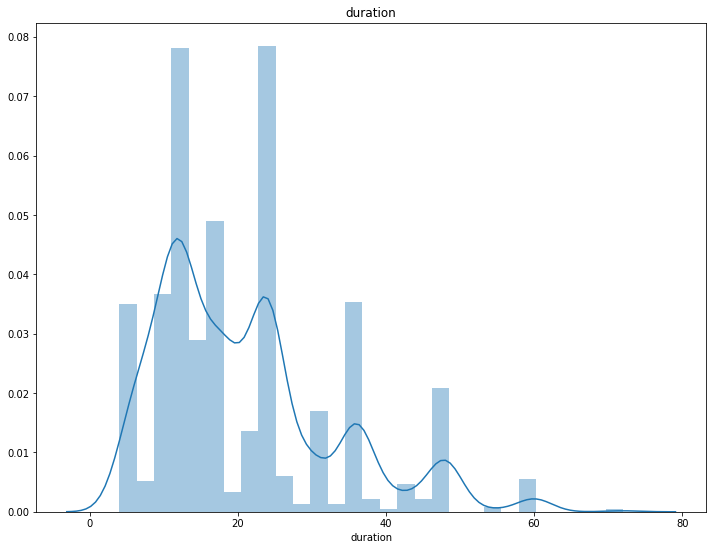

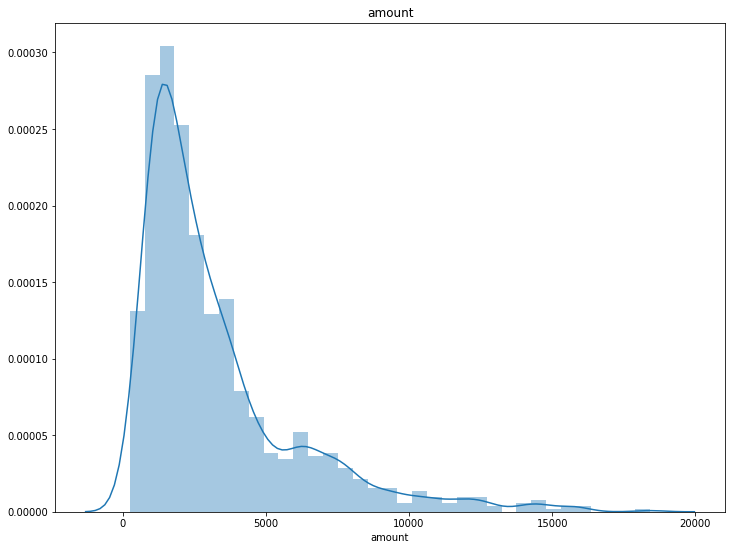

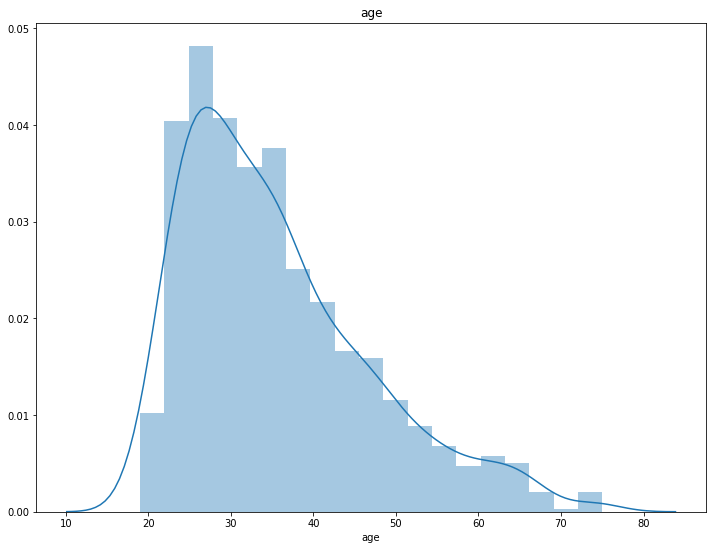

In [20]:
for i in num_cols:
    dist_plot(df, i)

## Count Plot

Count plot for all categorial features

ValueError: Could not interpret input 'class'

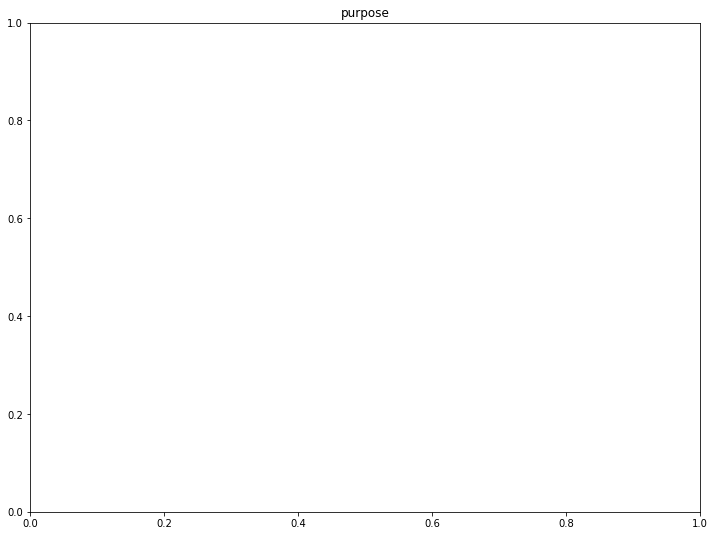

In [21]:
for i in cat_cols:
    count_plot(df, i)
    

## Count vs Category Plot

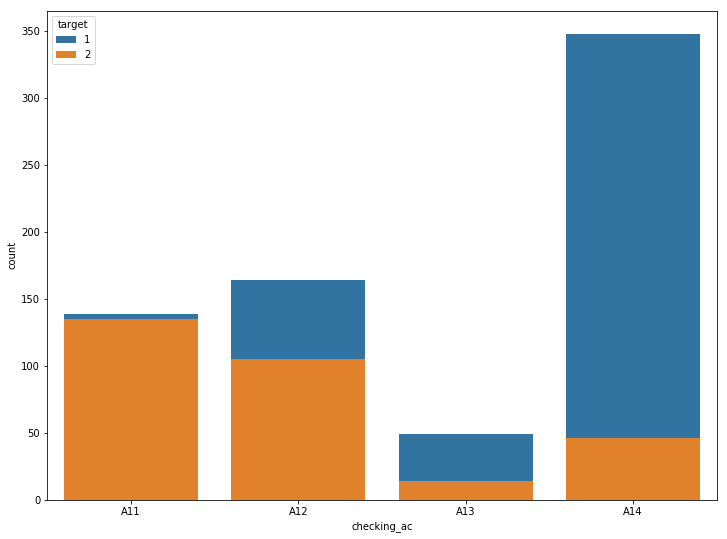

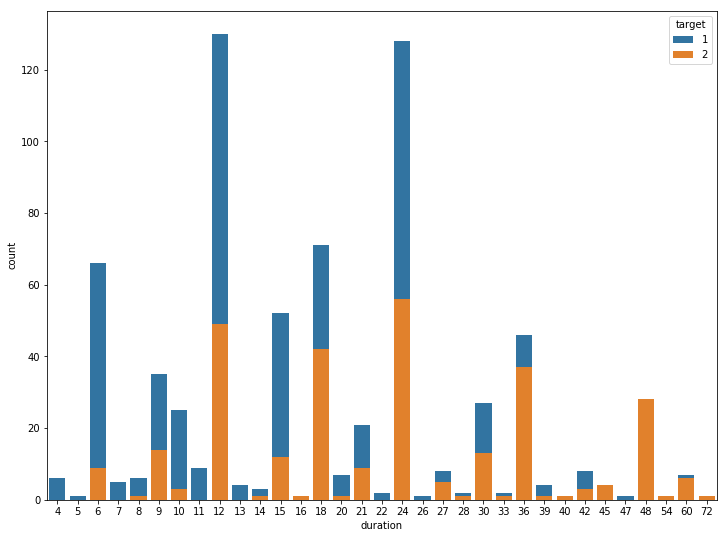

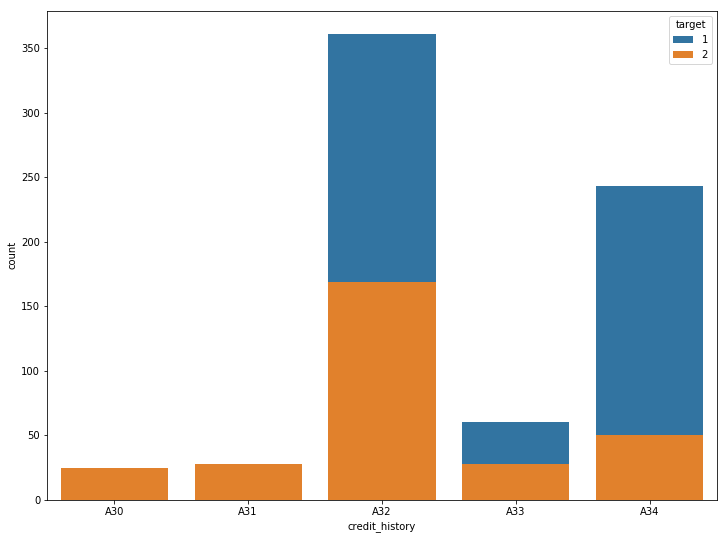

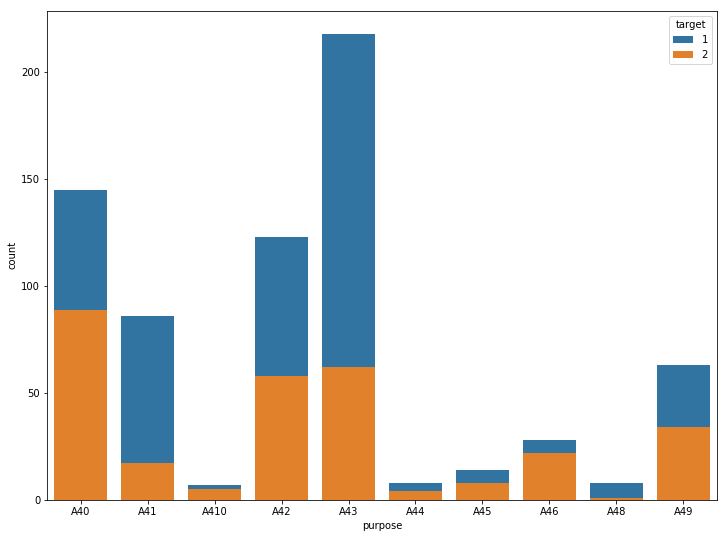

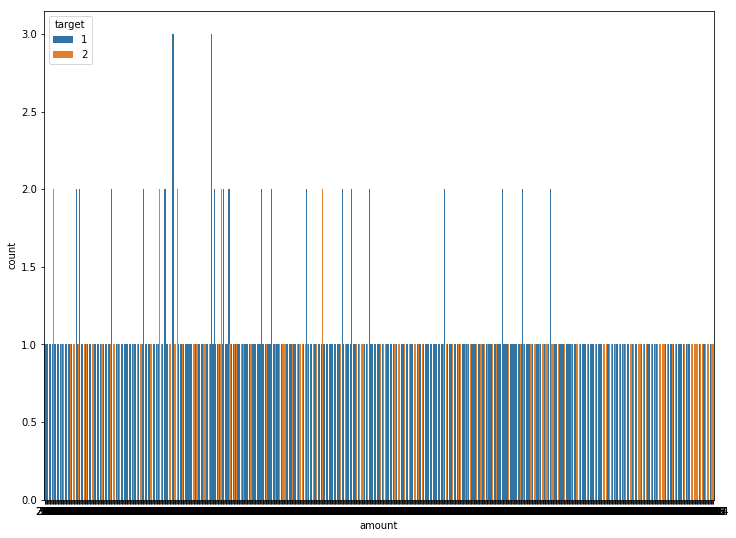

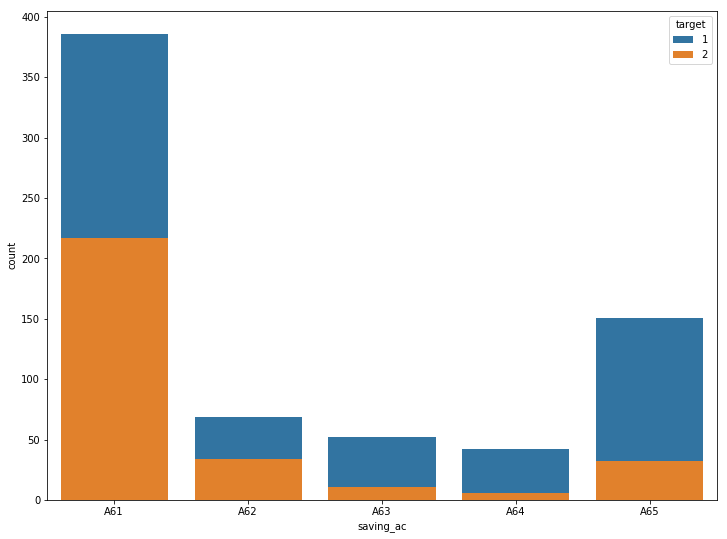

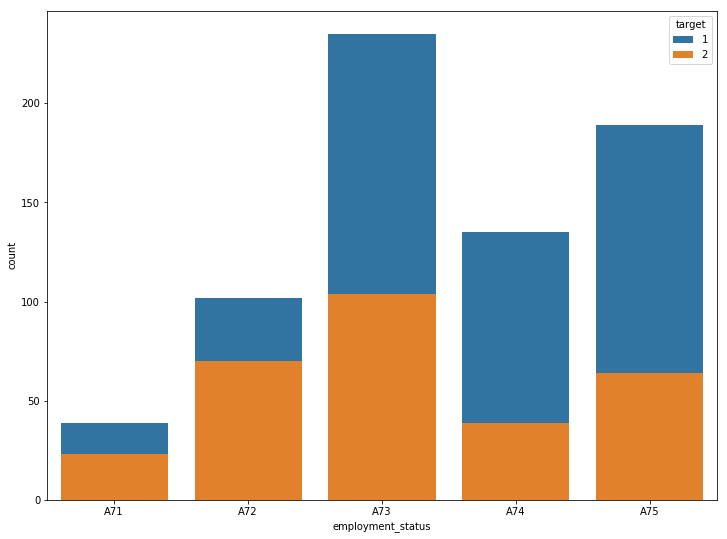

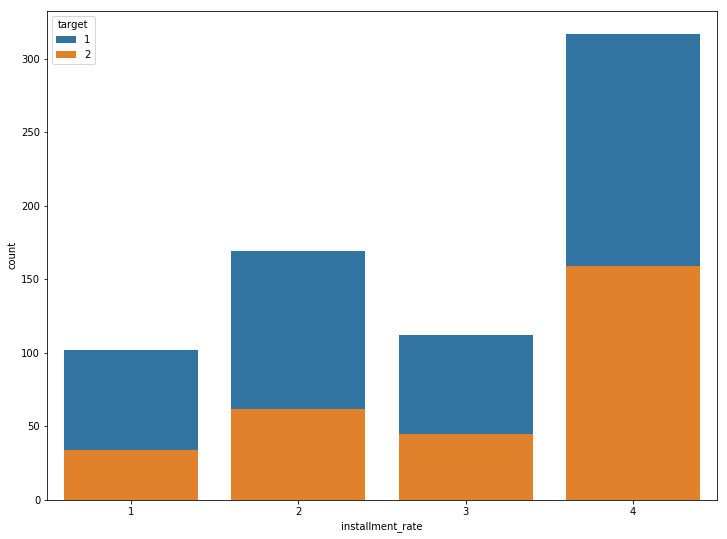

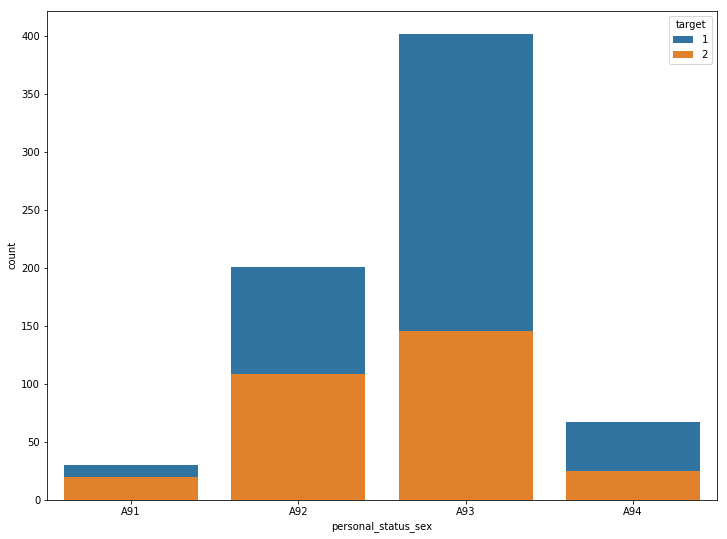

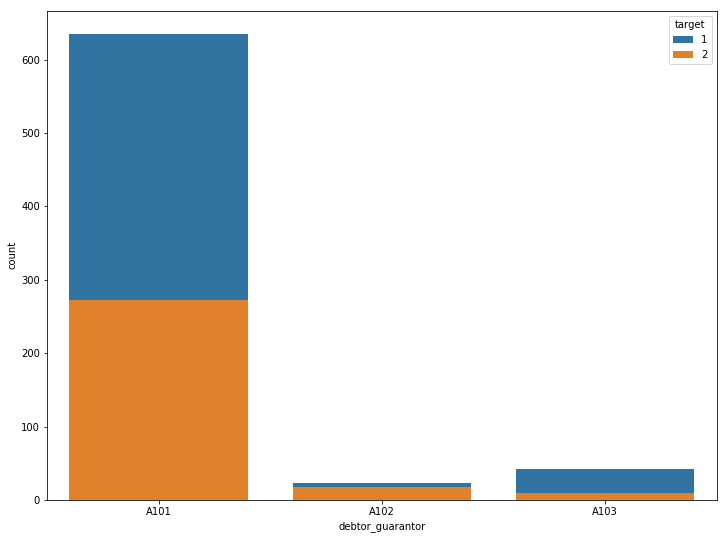

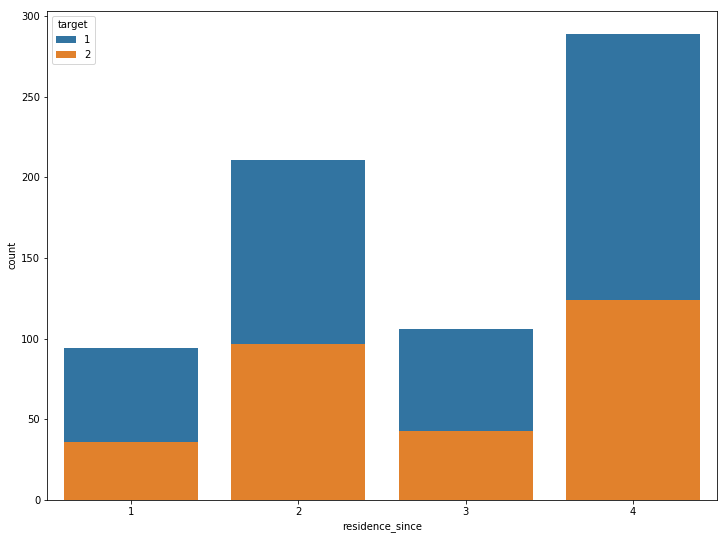

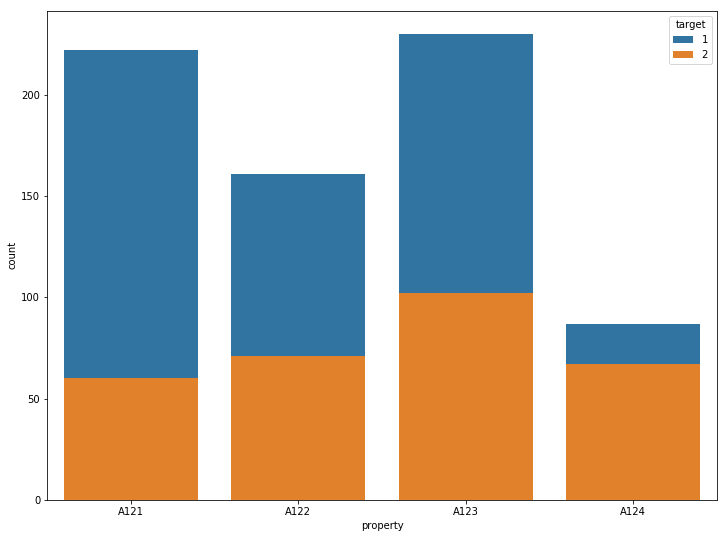

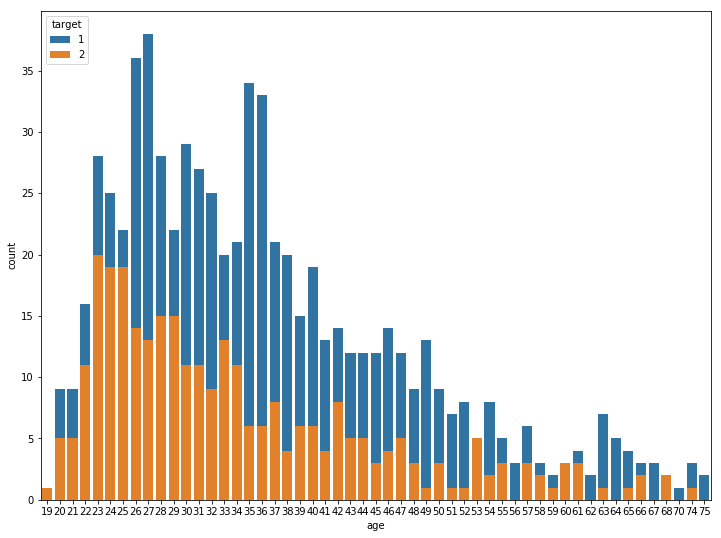

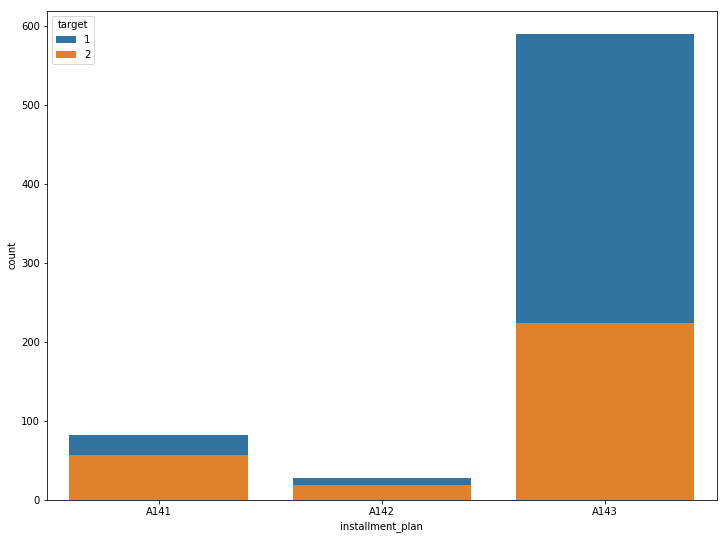

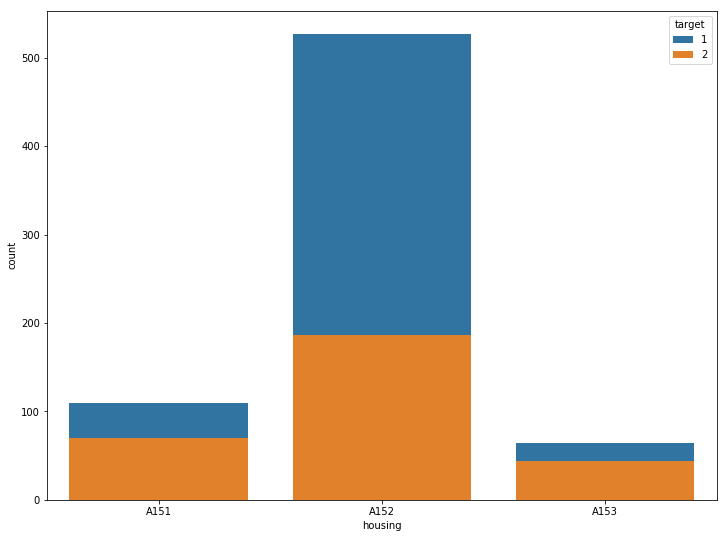

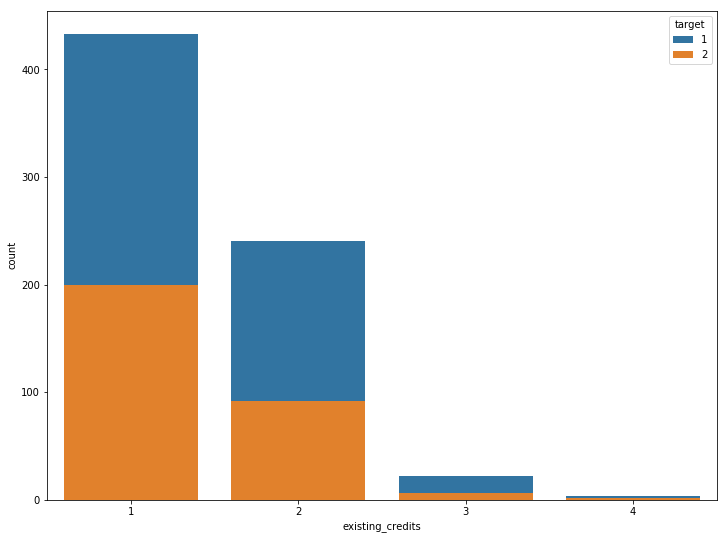

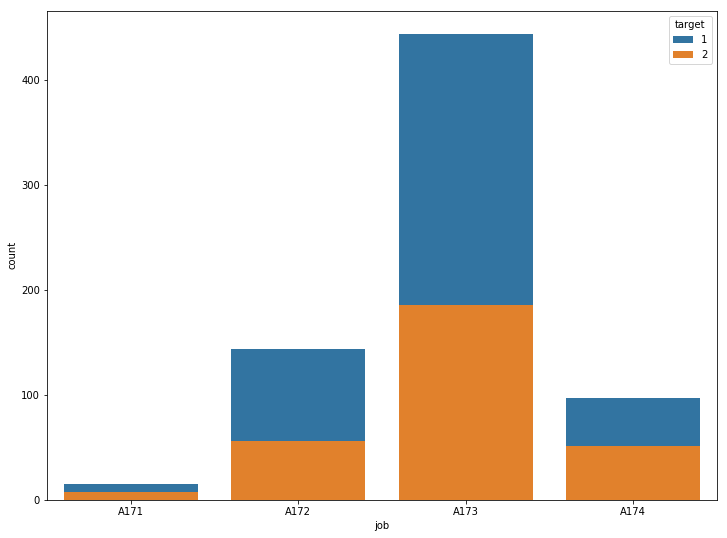

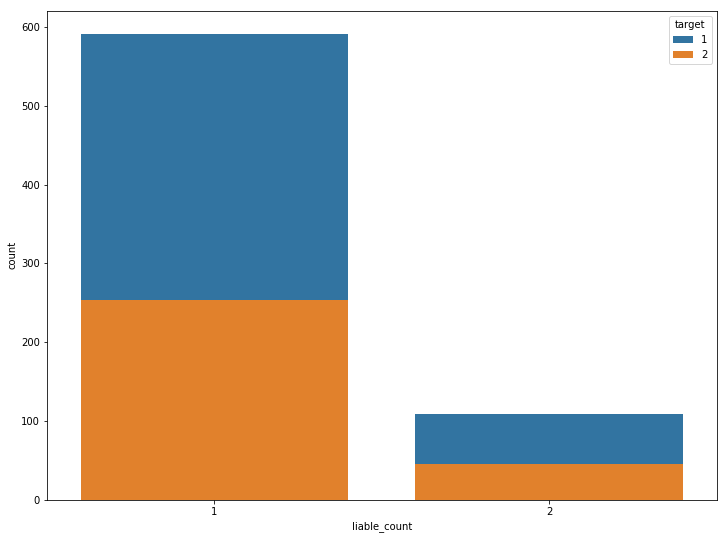

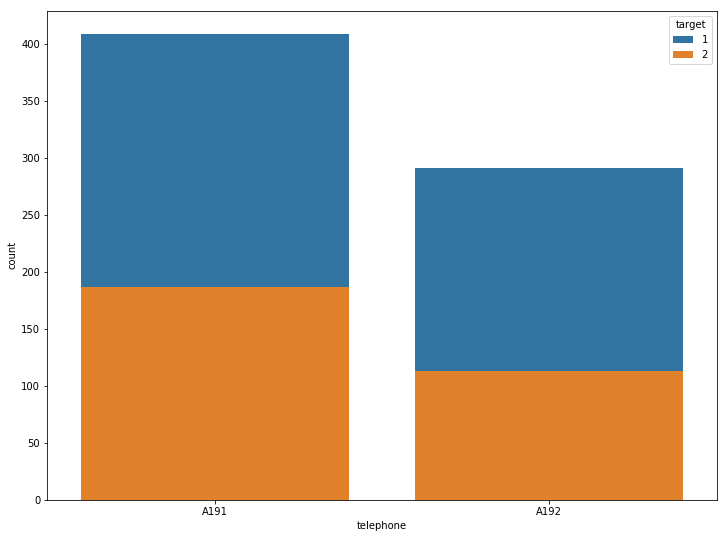

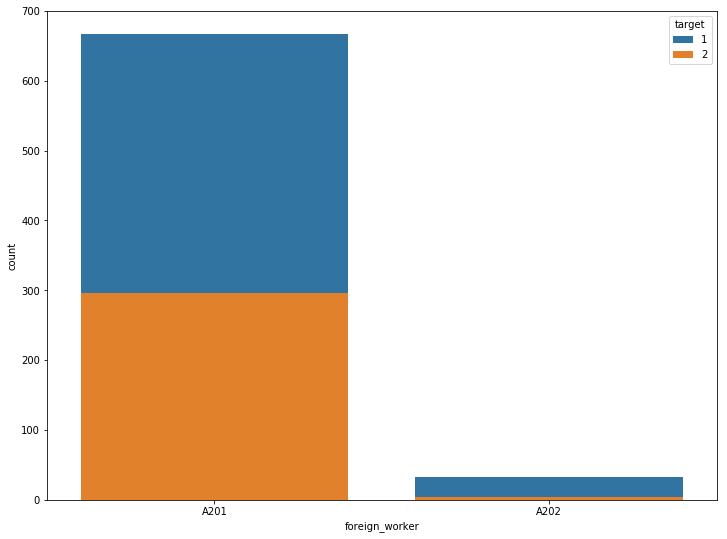

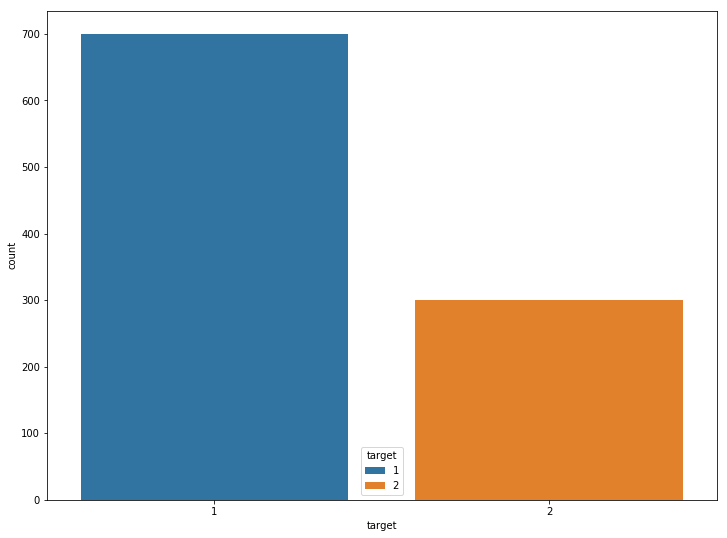

In [226]:
for i in df.columns:
    count_cat_plot(df, i)

# Removing uneccesary data points

In [7]:
X_train.drop('liable_count', axis=1)
X_test.drop('liable_count', axis=1)
X_val.drop('liable_count', axis=1)

X_train.drop('telephone', axis=1)
X_test.drop('telephone', axis=1)
X_val.drop('telephone', axis=1)
print("Removed")

Removed


# Splitting

Splitting the data into train val test set (64%, 16%, 20%)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, 20:21], test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

Shapes of the sets

In [9]:
print("X Train: " + str(X_train.shape))
print("Y Train: " + str(y_train.shape))

print("X Test: " + str(X_test.shape))
print("Y Test: " + str(y_test.shape))

print("X Val: " + str(X_val.shape))
print("Y Val: " + str(y_val.shape))

X Train: (640, 20)
Y Train: (640, 1)
X Test: (200, 20)
Y Test: (200, 1)
X Val: (160, 20)
Y Val: (160, 1)


In [10]:
num_cols_x_train = list(X_train._get_numeric_data().columns)
cat_cols_x_train = list(set(X_train.columns) - set(num_cols))

## Distribution Plot

Distribution after splitting

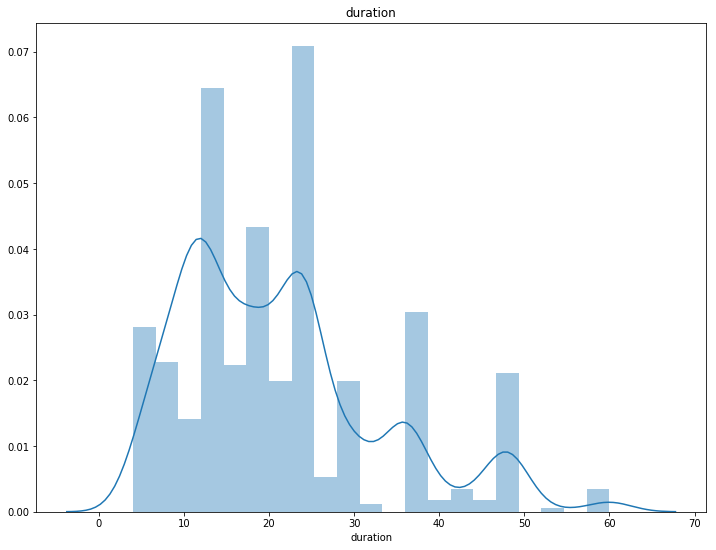

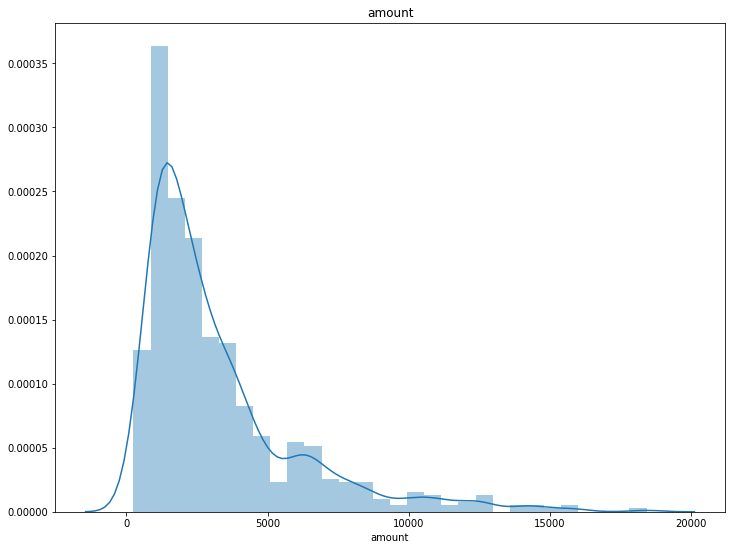

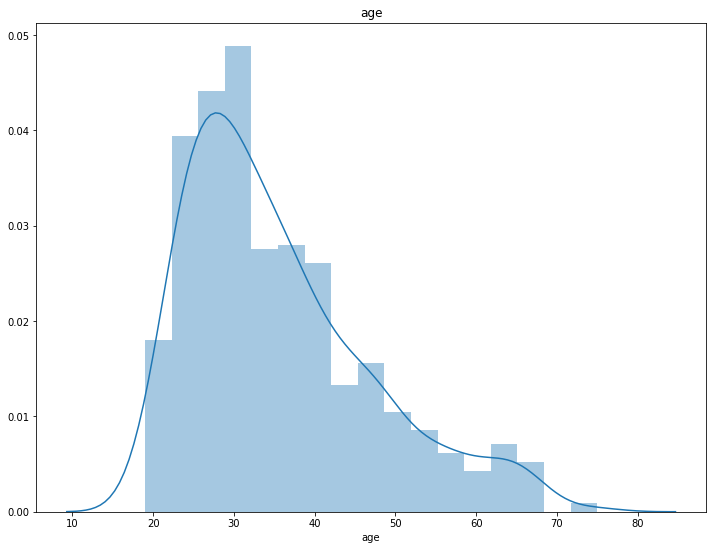

In [231]:
for i in num_cols_x_train:
    dist_plot(X_train, i)

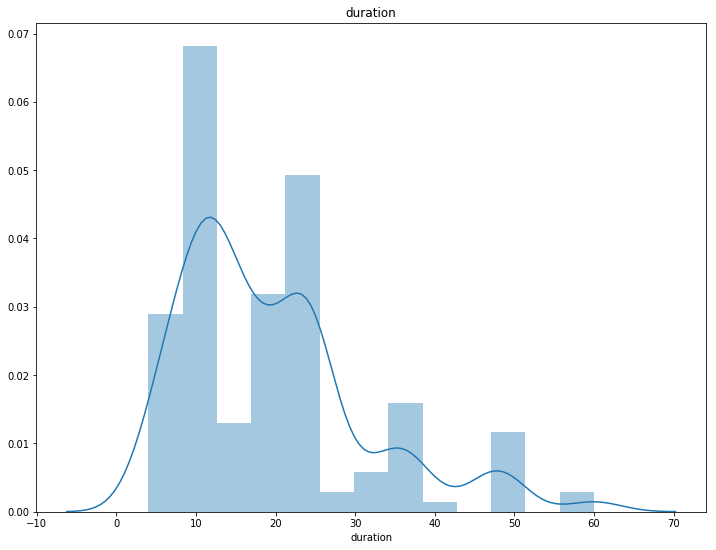

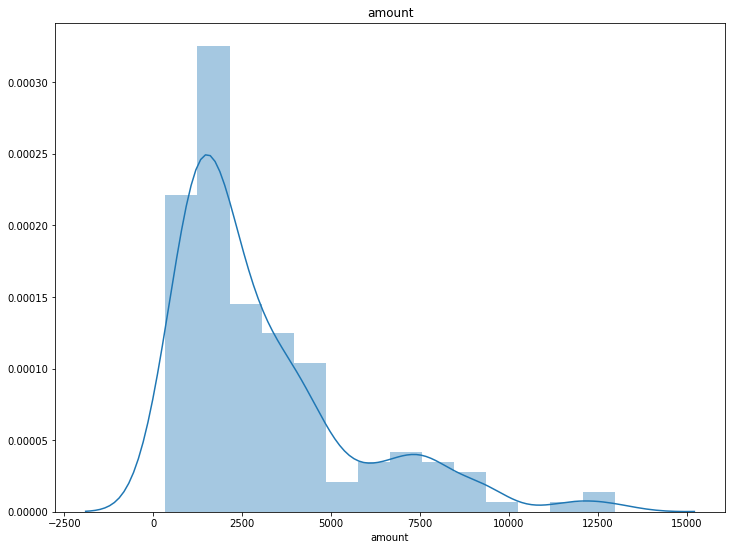

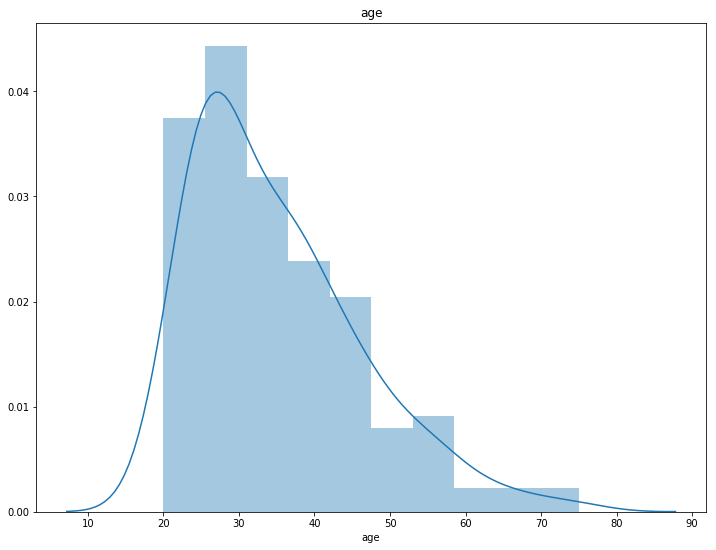

In [232]:
for i in num_cols_x_train:
    dist_plot(X_val, i)

# EDA after Splitting

## Univariate Analysis

### Q-Q Plot

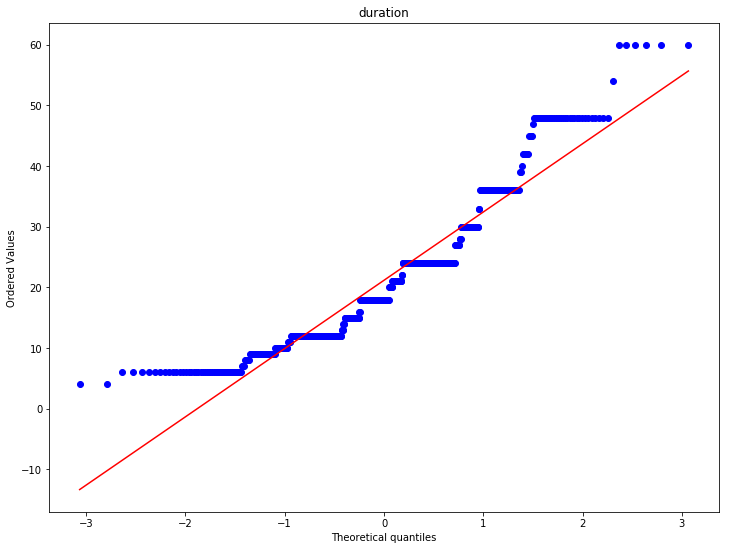

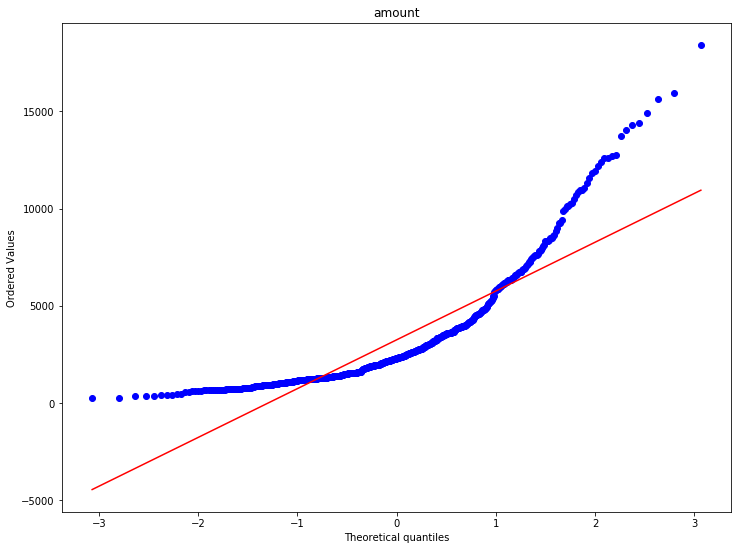

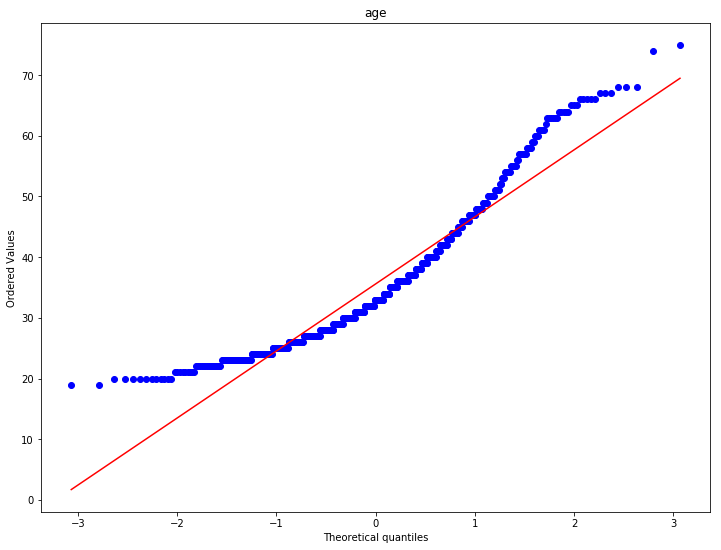

In [233]:
for i in num_cols_x_train:
    qq_plot(X_train, i)

### Box Whisker Plot

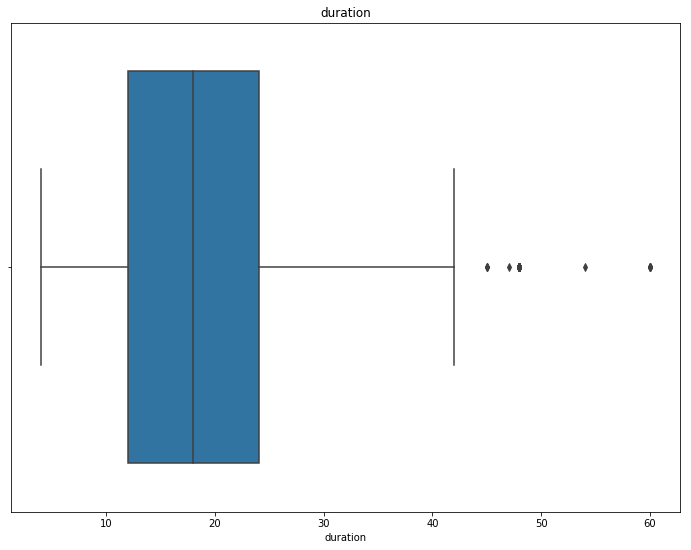

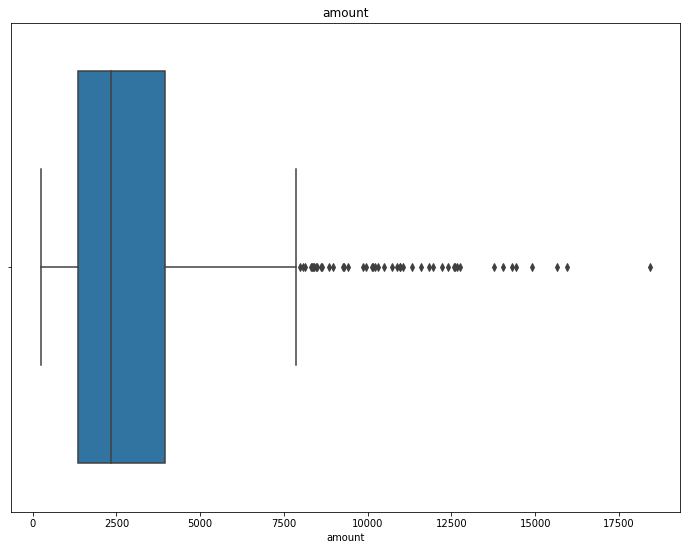

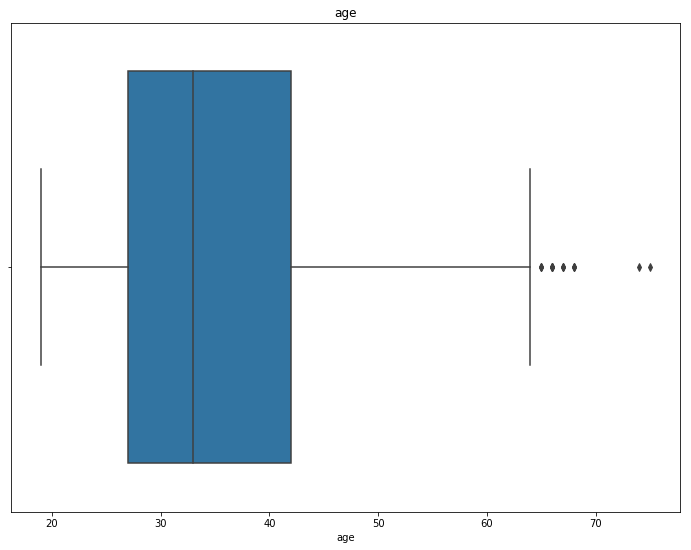

In [234]:
for i in num_cols_x_train:
    box_plot(X_train, i)

### 7-point Summary

In [235]:
X_train.describe()

,duration,amount,age
count,640.000000,640.000000,640.000000
mean,21.181250,3247.370313,35.589062
std,11.749803,2819.879502,11.508242
min,4.000000,250.000000,19.000000
25%,12.000000,1341.500000,27.000000
50%,18.000000,2322.500000,33.000000
75%,24.000000,3959.000000,42.000000
max,60.000000,18424.000000,75.000000


### Standard Deviation

In [236]:
std_dev = X_train.std(axis=0)
print(std_dev)

duration      11.749803
amount      2819.879502
age           11.508242
dtype: float64


## Bivariate Analysis

### Facet Plot

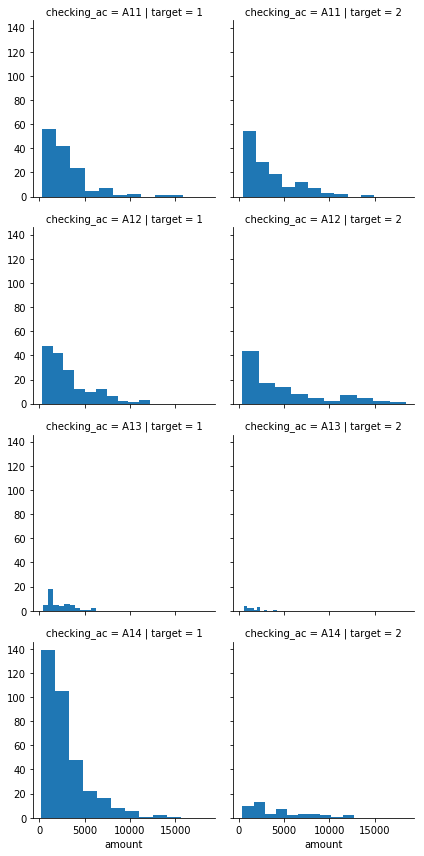

In [11]:
facet_plot(df, 'checking_ac', 'target', 'amount')

## Multivariate Analysis

### Pair Plot

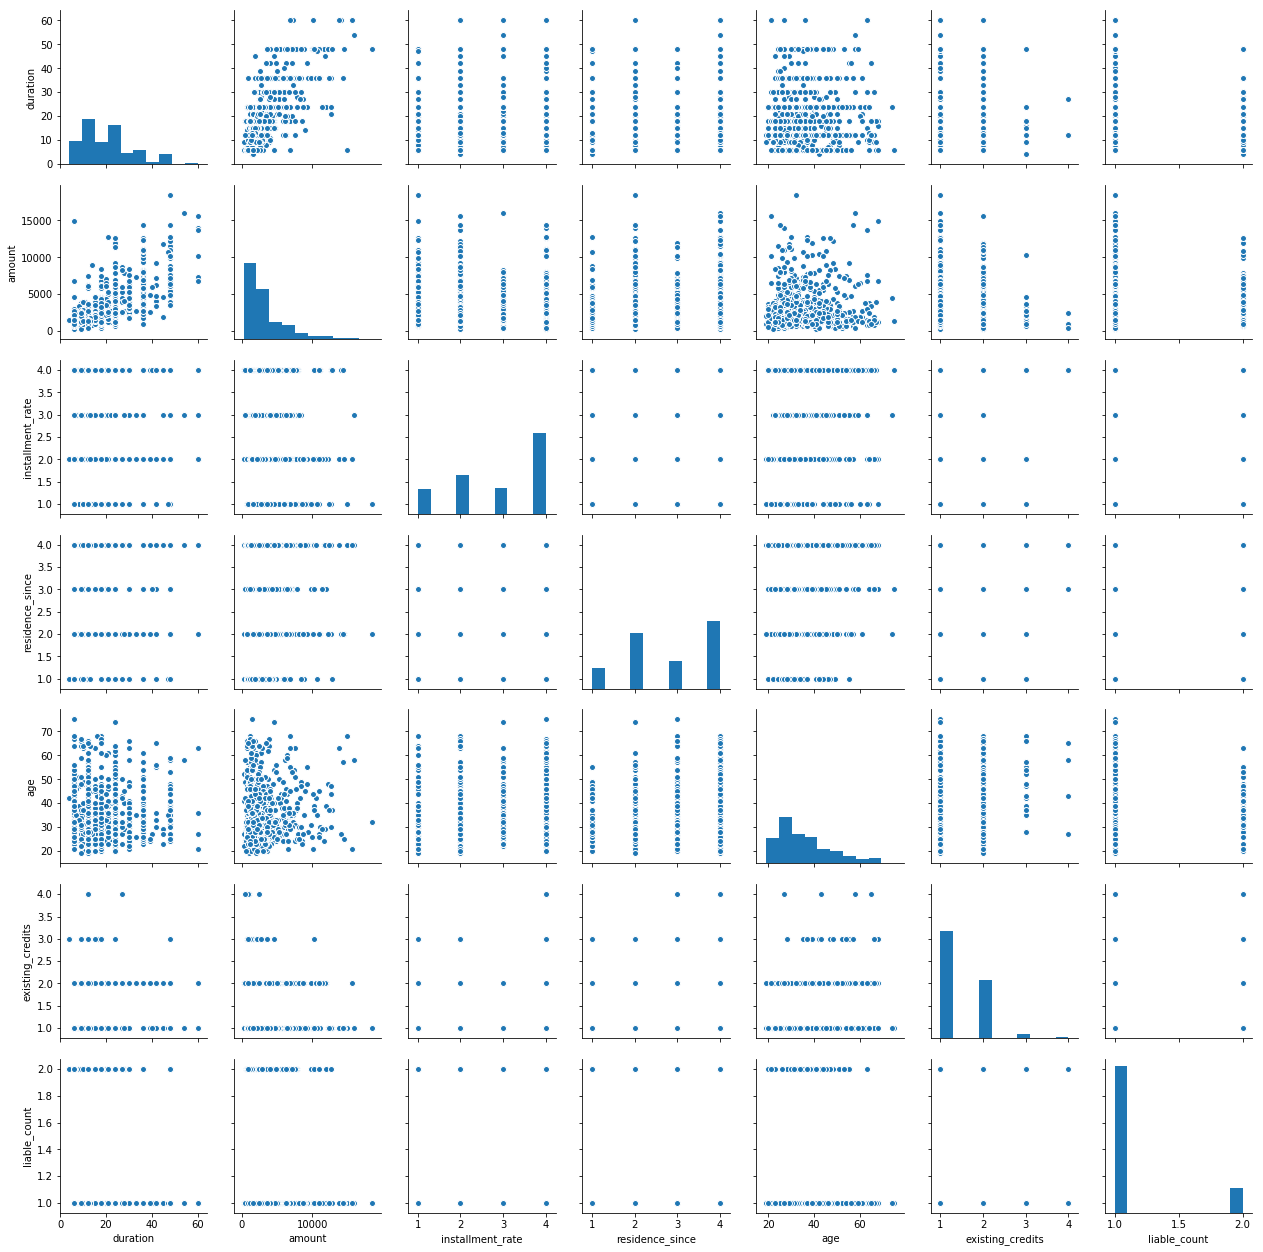

In [238]:
pair_plot(X_train)

## Heatmap

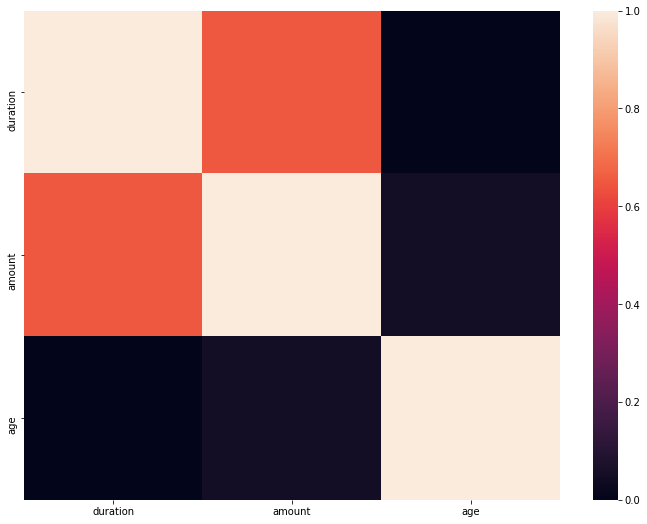

In [239]:
heatmap(X_train)

# Feature Preprocessing

## Missing Value Interpretation

Check for missing values

In [240]:
missing_val = X_train.isnull().sum()
print(missing_val)

checking_ac            0
duration               0
credit_history         0
purpose                0
amount                 0
saving_ac              0
employment_status      0
installment_rate       0
personal_status_sex    0
debtor_guarantor       0
residence_since        0
property               0
age                    0
installment_plan       0
housing                0
existing_credits       0
job                    0
liable_count           0
telephone              0
foreign_worker         0
dtype: int64


## Outliers Treatment

### KDE Plot

Plotting iqr over the distribution

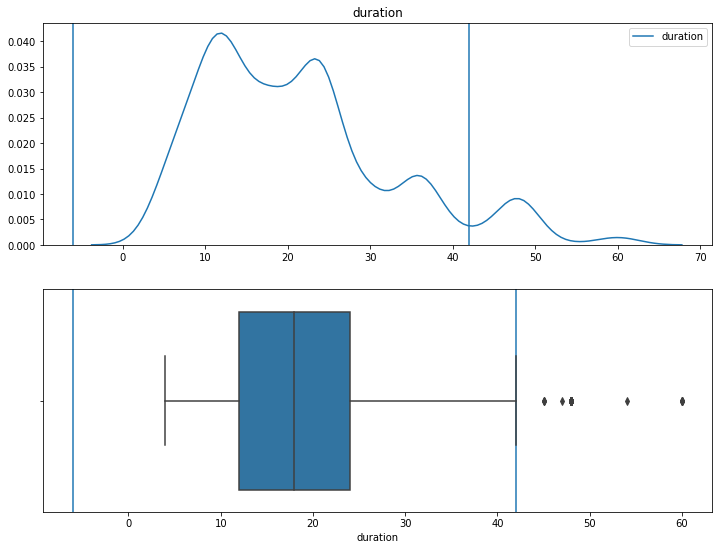

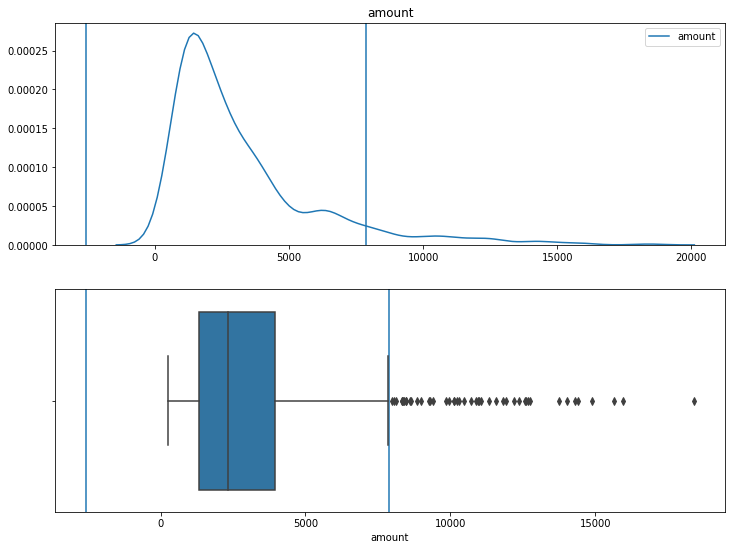

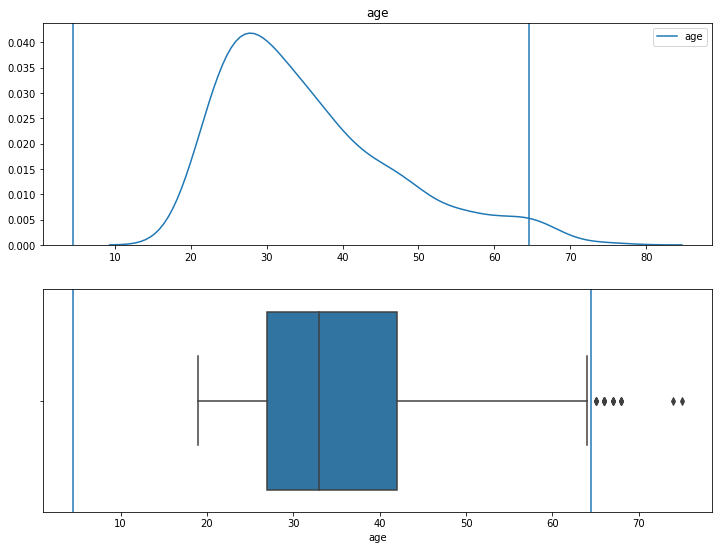

In [241]:
for i in num_cols_x_train:
    q75, q25 = np.percentile(X_train[i], [75 ,25])
    iqr = q75 - q25
    min_v = q25 - (iqr*1.5)
    max_v = q75 + (iqr*1.5)
    
    plt.subplot(211)
    plt.title(i)
    plt.axvline(x=min_v)
    plt.axvline(x=max_v)
    ax = sns.kdeplot(X_train[i])
    plt.subplot(212)
    plt.axvline(x=min_v)
    plt.axvline(x=max_v)
    ax = sns.boxplot(X_train[i])

    plt.show()
    

### Transformation

Applying transformation to treat outliers

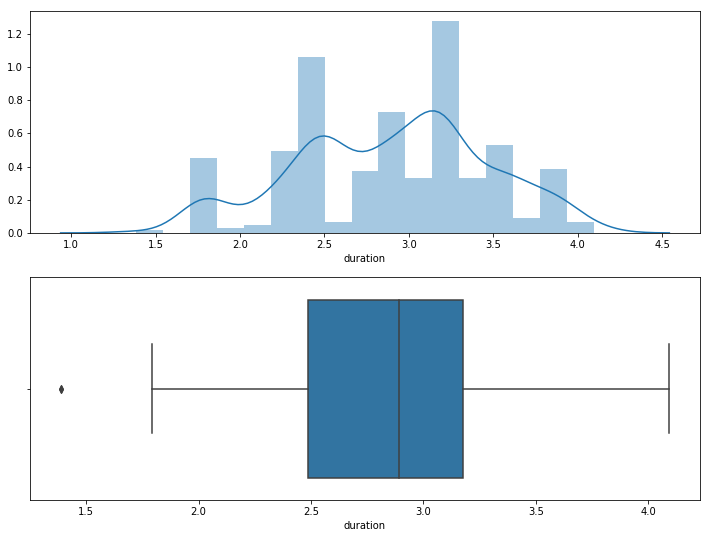

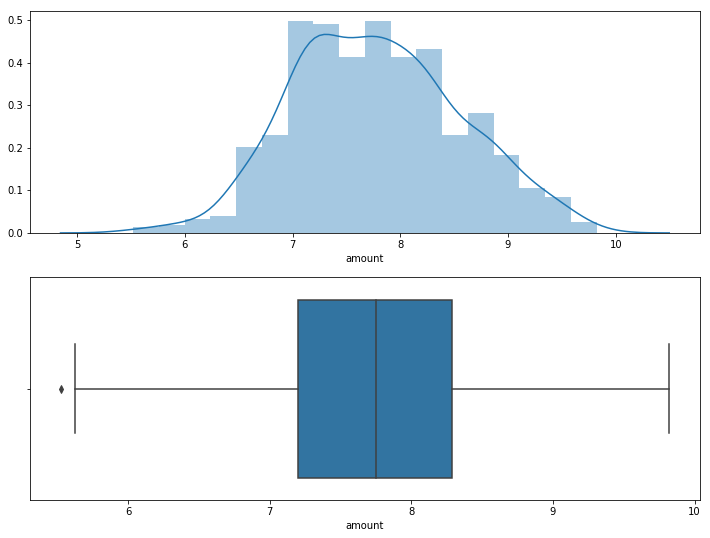

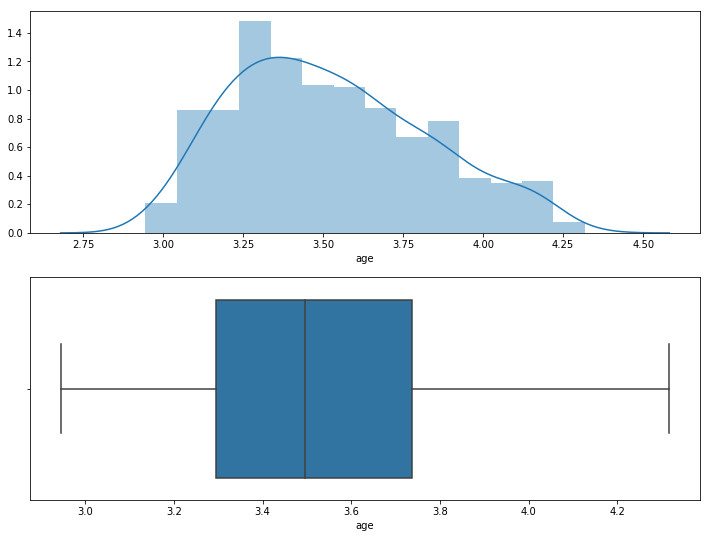

In [242]:
right_skew_removal(X_train, 'duration')
right_skew_removal(X_test, 'duration')
right_skew_removal(X_val, 'duration')

plt.subplot('211')
sns.distplot(X_train['duration'])
plt.subplot('212')
sns.boxplot(X_train['duration'])
plt.show()

right_skew_removal(X_train, 'amount')
right_skew_removal(X_test, 'amount')
right_skew_removal(X_val, 'amount')

plt.subplot('211')
sns.distplot(X_train['amount'])
plt.subplot('212')
sns.boxplot(X_train['amount'])
plt.show()

right_skew_removal(X_train, 'age')
right_skew_removal(X_test, 'age')
right_skew_removal(X_val, 'age')

plt.subplot('211')
sns.distplot(X_train['age'])
plt.subplot('212')
sns.boxplot(X_train['age'])
plt.show()

### Outliers Removal

Atlast remove all the outliers after transformation

/home/ubuntu/miniconda/envs/credit/lib/python3.6/site-packages/ipykernel_launcher.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


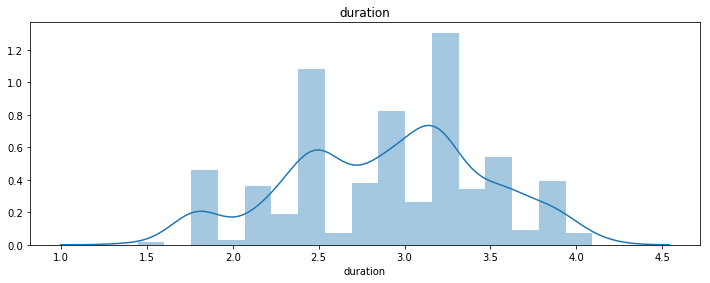

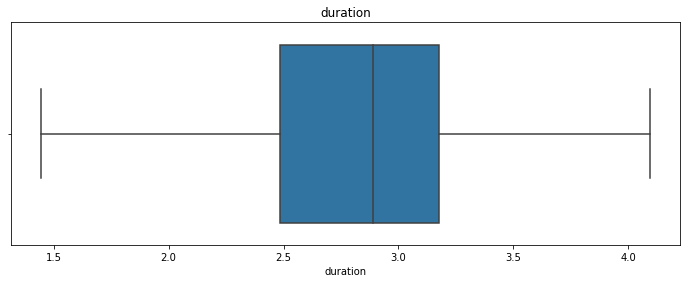

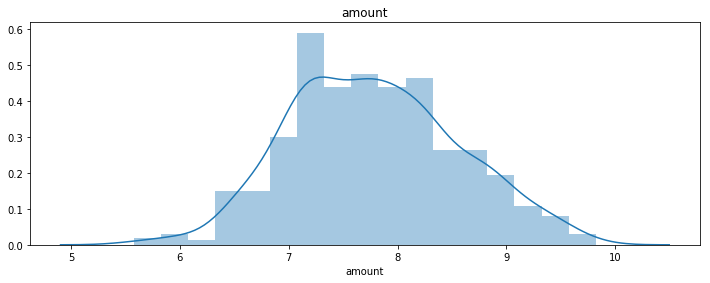

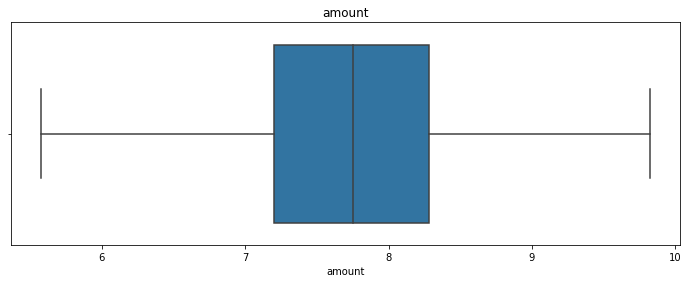

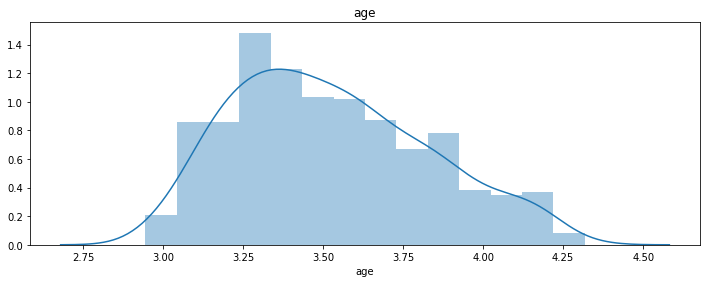

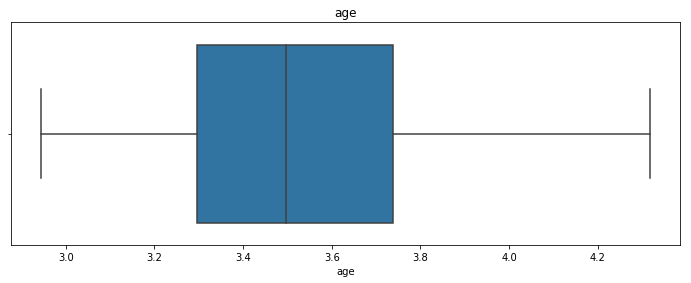

In [243]:
for i in num_cols_x_train:
    remove_outlier(X_train, i)

# Encoding

Encoding numeric and categorical values

In [244]:
checking_ac = {
    'A11': 0,
    'A14': 1,
    'A12': 2,
    'A13': 3
}

saving_ac = {
    'A61': 0,
    'A64': 1,
    'A62': 2,
    'A63': 3,
    'A64': 4,
    'A65': 5
}

employment_status = {
    'A71' : 0,
    'A72' : 1,
    'A73' : 2,
    'A74' : 3,
    'A75' : 4
}

job = {
    'A171': 0,
    'A172': 1,
    'A173': 2,
    'A174': 3
}

telephone = {
    'A191': 0,
    'A192': 1
}

foreign_worker = {
    'A201': 0,
    'A202': 1
}

In [12]:
cat_cols = []
for col in X_train.columns:
    if len(X_train[col].unique()) < 11:
        cat_cols.append(col)
        X_train[col]=X_train[col].astype('category')

level_encoding_cols = ["checking_ac", "saving_ac", "employment_status", "installment_rate", "job", "residence_since", "liable_count", "existing_credits", 'telephone', 'foreign_worker']
one_hot_encoding_cols = list(set(cat_cols_x_train) - set(level_encoding_cols))

In [13]:
X_train.head()

,checking_ac,duration,credit_history,purpose,amount,saving_ac,employment_status,installment_rate,personal_status_sex,debtor_guarantor,residence_since,property,age,installment_plan,housing,existing_credits,job,liable_count,telephone,foreign_worker
908,A14,15,A33,A41,3594,A61,A72,1,A92,A101,2,A122,46,A143,A152,2,A172,1,A191,A201
989,A12,24,A34,A43,1743,A61,A75,4,A93,A101,2,A122,48,A143,A152,2,A172,1,A191,A201
382,A14,22,A32,A40,1283,A65,A74,4,A92,A101,4,A122,25,A143,A151,1,A173,1,A191,A201
122,A14,12,A32,A42,1768,A61,A73,3,A93,A101,2,A121,24,A143,A151,1,A172,1,A191,A201
136,A14,27,A33,A41,8613,A64,A73,2,A93,A101,2,A123,27,A143,A152,2,A173,1,A191,A201


## Label Encoding

In [246]:
x_col = {'checking_ac': checking_ac, 'saving_ac': saving_ac, 'employment_status': employment_status, 'job': job, 'telephone': telephone, 'foreign_worker': foreign_worker}
for indx, val in x_col.items():
    col = indx
    rep_dict = val
    X_train[col].replace(rep_dict, inplace=True)
    X_val[col].replace(rep_dict, inplace=True)
    X_test[col].replace(rep_dict, inplace=True)

In [247]:
X_val.head()

,checking_ac,duration,credit_history,purpose,amount,saving_ac,employment_status,installment_rate,personal_status_sex,debtor_guarantor,residence_since,property,age,installment_plan,housing,existing_credits,job,liable_count,telephone,foreign_worker
340,2,3.178054,A34,A46,8.655737,0,1,2,A92,A101,4,A124,3.178054,A143,A153,2,2,1,1,0
500,0,3.178054,A32,A40,8.046549,0,1,4,A92,A101,1,A122,3.295837,A143,A152,1,2,1,0,0
118,0,3.496508,A34,A42,8.361942,3,2,1,A92,A101,4,A123,3.135494,A143,A152,2,2,1,0,0
792,1,1.791759,A34,A42,7.107425,5,2,1,A94,A101,2,A122,3.295837,A143,A152,2,2,1,0,0
635,1,2.484907,A32,A46,7.239215,0,4,4,A93,A101,4,A122,3.850148,A141,A152,3,2,2,1,0


## One Hot Encoding

In [248]:
def one_hot_encoding(train, val, test, col_name):
    x = pd.get_dummies(train[col_name])
    y = pd.get_dummies(test[col_name])
    z = pd.get_dummies(val[col_name])
    for i in x.columns:
        train[col_name + ' is ' + i + '?'] = x[i]
        
    for i in z.columns:
        val[col_name + ' is ' + i + '?'] = z[i]
        
    for i in y.columns:
        test[col_name + ' is ' + i + '?'] = y[i]

    train.drop(col_name, axis=1, inplace=True)
    val.drop(col_name, axis=1, inplace=True)
    test.drop(col_name, axis=1, inplace=True)

In [249]:
for i in one_hot_encoding_cols:
    one_hot_encoding(X_train, X_val, X_test, i)

In [250]:
X_val.head()

,checking_ac,duration,amount,saving_ac,employment_status,installment_rate,residence_since,age,existing_credits,job,liable_count,telephone,foreign_worker,credit_history is A30?,credit_history is A31?,credit_history is A32?,credit_history is A33?,credit_history is A34?,personal_status_sex is A91?,personal_status_sex is A92?,personal_status_sex is A93?,personal_status_sex is A94?,debtor_guarantor is A101?,debtor_guarantor is A102?,debtor_guarantor is A103?,purpose is A40?,purpose is A41?,purpose is A410?,purpose is A42?,purpose is A43?,purpose is A44?,purpose is A45?,purpose is A46?,purpose is A48?,purpose is A49?,housing is A151?,housing is A152?,housing is A153?,property is A121?,property is A122?,property is A123?,property is A124?,installment_plan is A141?,installment_plan is A142?,installment_plan is A143?
340,2,3.178054,8.655737,0,1,2,4,3.178054,2,2,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
500,0,3.178054,8.046549,0,1,4,1,3.295837,1,2,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
118,0,3.496508,8.361942,3,2,1,4,3.135494,2,2,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
792,1,1.791759,7.107425,5,2,1,2,3.295837,2,2,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
635,1,2.484907,7.239215,0,4,4,4,3.850148,3,2,2,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0


In [251]:
X_test.head()

,checking_ac,duration,amount,saving_ac,employment_status,installment_rate,residence_since,age,existing_credits,job,liable_count,telephone,foreign_worker,credit_history is A30?,credit_history is A31?,credit_history is A32?,credit_history is A33?,credit_history is A34?,personal_status_sex is A91?,personal_status_sex is A92?,personal_status_sex is A93?,personal_status_sex is A94?,debtor_guarantor is A101?,debtor_guarantor is A102?,debtor_guarantor is A103?,purpose is A40?,purpose is A41?,purpose is A410?,purpose is A42?,purpose is A43?,purpose is A44?,purpose is A45?,purpose is A46?,purpose is A48?,purpose is A49?,housing is A151?,housing is A152?,housing is A153?,property is A121?,property is A122?,property is A123?,property is A124?,installment_plan is A141?,installment_plan is A142?,installment_plan is A143?
507,2,2.708050,8.832004,2,0,1,2,3.526361,1,3,2,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
818,0,3.583519,9.671366,0,0,2,3,3.761200,1,3,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
452,1,2.484907,7.922624,0,4,2,4,3.526361,2,2,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
368,0,3.583519,8.144969,0,4,4,2,3.737670,1,2,2,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
242,0,3.871201,8.434898,0,4,3,4,3.178054,2,2,2,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1


## Normalizing the data

In [252]:
norm_X_train = preprocessing.normalize(X_train)
norm_X_test = preprocessing.normalize(X_test)

In [253]:
X_val.head()

,checking_ac,duration,amount,saving_ac,employment_status,installment_rate,residence_since,age,existing_credits,job,liable_count,telephone,foreign_worker,credit_history is A30?,credit_history is A31?,credit_history is A32?,credit_history is A33?,credit_history is A34?,personal_status_sex is A91?,personal_status_sex is A92?,personal_status_sex is A93?,personal_status_sex is A94?,debtor_guarantor is A101?,debtor_guarantor is A102?,debtor_guarantor is A103?,purpose is A40?,purpose is A41?,purpose is A410?,purpose is A42?,purpose is A43?,purpose is A44?,purpose is A45?,purpose is A46?,purpose is A48?,purpose is A49?,housing is A151?,housing is A152?,housing is A153?,property is A121?,property is A122?,property is A123?,property is A124?,installment_plan is A141?,installment_plan is A142?,installment_plan is A143?
340,2,3.178054,8.655737,0,1,2,4,3.178054,2,2,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
500,0,3.178054,8.046549,0,1,4,1,3.295837,1,2,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
118,0,3.496508,8.361942,3,2,1,4,3.135494,2,2,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
792,1,1.791759,7.107425,5,2,1,2,3.295837,2,2,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
635,1,2.484907,7.239215,0,4,4,4,3.850148,3,2,2,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0


# Modeling

In [254]:
X_train['amount_cube'] = X_train['amount'] ** 3
X_test['amount_cube'] = X_test['amount'] ** 3
X_val['amount_cube'] = X_val['amount'] ** 3

X_train['duration_cube'] = X_train['duration'] ** 2
X_test['duration_cube'] = X_test['duration'] ** 2
X_val['duration_cube'] = X_val['duration'] ** 2
print('done')

done


## Logistic Regression

Accuracy on Validation Set: 0.775
Accuracy on Test Set: 0.73


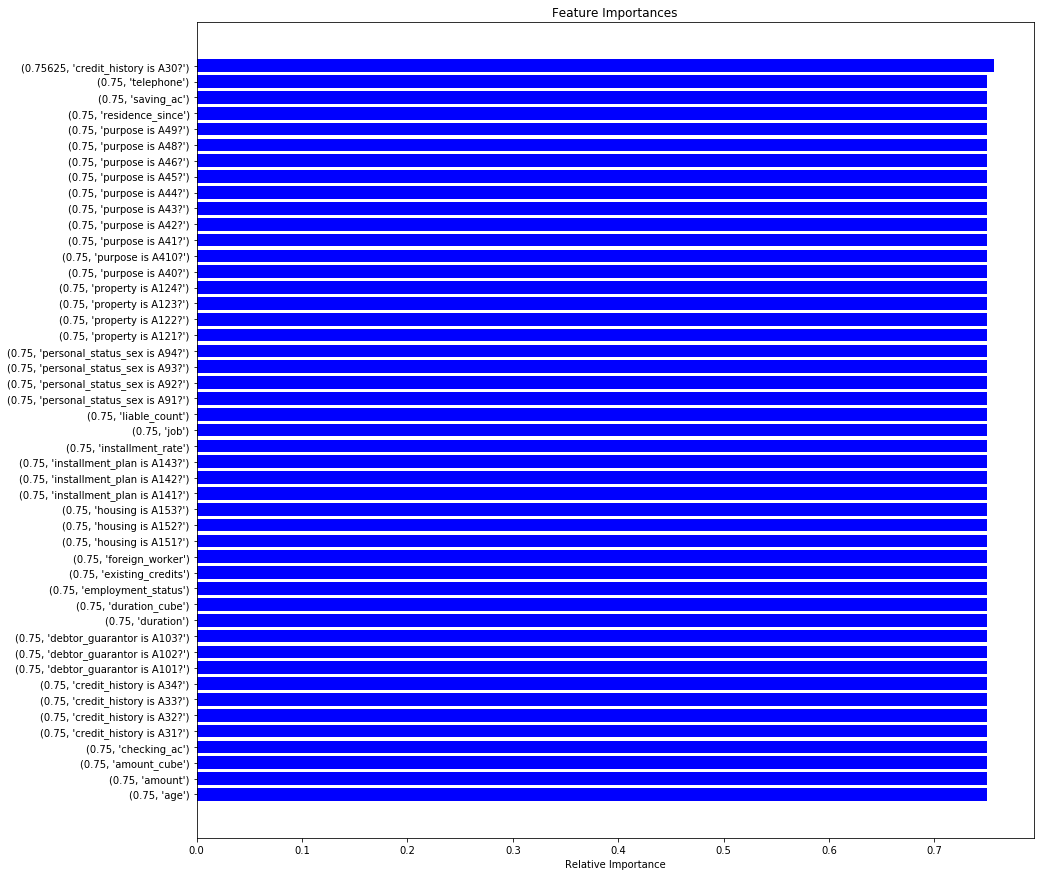

In [255]:
reg = LogisticRegression()
reg.fit(X_train, y_train.values.ravel())
predict = reg.predict(X_val)
acc = accuracy_score(y_val, predict)
print("Accuracy on Validation Set: " + str(acc))
predict = reg.predict(X_test)
acc = accuracy_score(y_test, predict)
print("Accuracy on Test Set: " + str(acc))
plot_features(X_train, X_val, y_train, y_val, reg)

## SVM

In [262]:
# clf = svm.SVC()
# clf.fit(X_train, y_train.values.ravel())
# predict = clf.predict(X_val)
# acc = accuracy_score(y_val, predict)
# cnf_matrix = confusion_matrix(y_val, predict)
# print("Accuracy on Validation Set: " + str(acc))
# print("Confusion matrix for Validation Set")
# print(cnf_matrix)
# predict = clf.predict(X_test)
# acc = accuracy_score(y_test, predict)
# cnf_matrix = confusion_matrix(y_test, predict)
# print("Accuracy on Test Set: " + str(acc))
# print("Confusion matrix for Test Set")
# print(cnf_matrix)

# plot_features(X_train, X_val, y_train, y_val, reg)

# not important 

# Decision Tree

Accuracy on Validation Set: 0.7375
Confusion matrix for Validation Set
[[94 26]
 [16 24]]
Accuracy on Test Set: 0.685
Confusion matrix for Test Set
[[106  35]
 [ 28  31]]


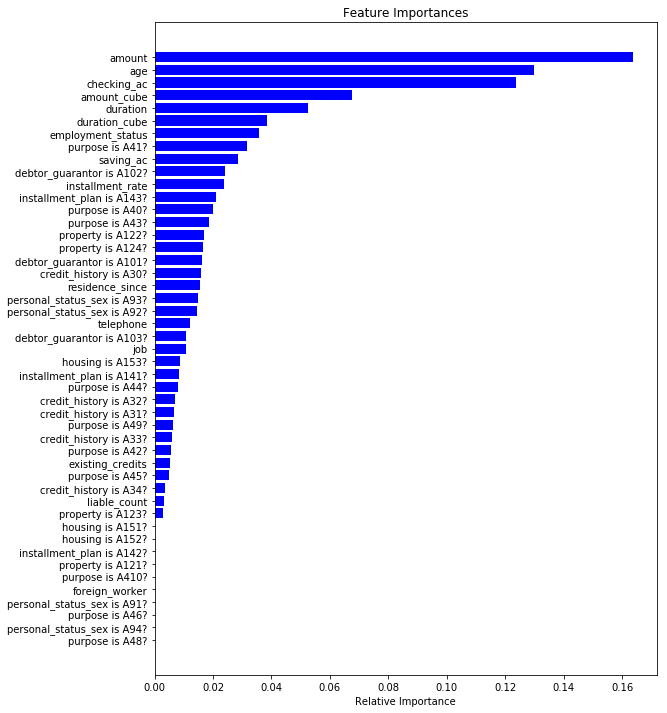

In [257]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train.values.ravel())
predict = clf.predict(X_val)
acc = accuracy_score(y_val, predict)
cnf_matrix = confusion_matrix(y_val, predict)
print("Accuracy on Validation Set: " + str(acc))
print("Confusion matrix for Validation Set")
print(cnf_matrix)
predict = clf.predict(X_test)
acc = accuracy_score(y_test, predict)
cnf_matrix = confusion_matrix(y_test, predict)
print("Accuracy on Test Set: " + str(acc))
print("Confusion matrix for Test Set")
print(cnf_matrix)

plot_feature
















s_clf(clf)

## Random Forest

In [263]:
# clf = RandomForestClassifier(max_depth=3, random_state=0)
# clf.fit(X_train, y_train.values.ravel())
# predict = clf.predict(X_val)
# acc = accuracy_score(y_val, predict)
# cnf_matrix = confusion_matrix(y_val, predict)
# print("Accuracy on Validation Set: " + str(acc))
# print("Confusion matrix for Validation Set")
# print(cnf_matrix)
# predict = clf.predict(X_test)
# acc = accuracy_score(y_test, predict)
# cnf_matrix = confusion_matrix(y_test, predict)
# print("Accuracy on Test Set: " + str(acc))
# print("Confusion matrix for Test Set")
# print(cnf_matrix)

# plot_features_clf(clf)

# Not usefule

## Gradient Boosting

Accuracy on Validation Set: 0.80625
Confusion matrix for Validation Set
[[107  13]
 [ 18  22]]
Accuracy on Test Set: 0.775
Confusion matrix for Test Set
[[129  12]
 [ 33  26]]


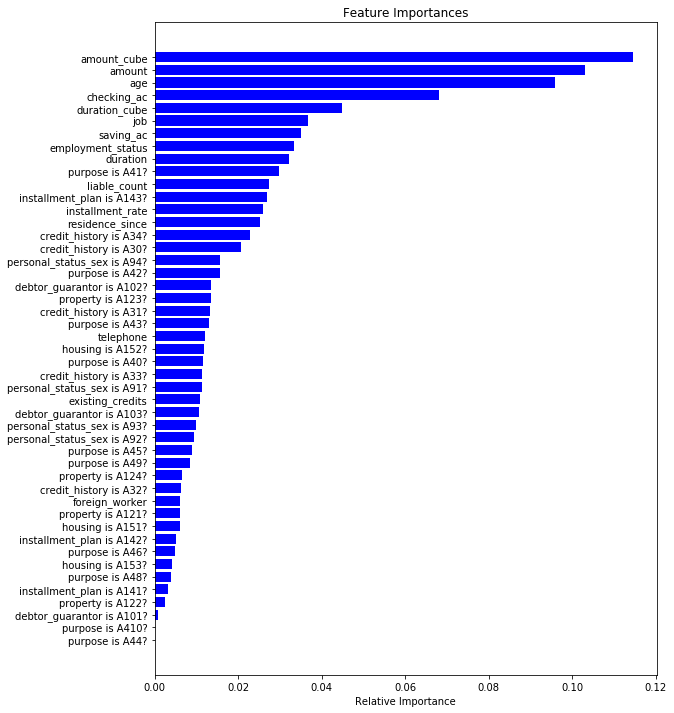

In [259]:
clf = GradientBoostingClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train.values.ravel())
predict = clf.predict(X_val)
acc = accuracy_score(y_val, predict)
cnf_matrix = confusion_matrix(y_val, predict)
print("Accuracy on Validation Set: " + str(acc))
print("Confusion matrix for Validation Set")
print(cnf_matrix)
predict = clf.predict(X_test)
acc = accuracy_score(y_test, predict)
cnf_matrix = confusion_matrix(y_test, predict)
print("Accuracy on Test Set: " + str(acc))
print("Confusion matrix for Test Set")
print(cnf_matrix)

plot_features_clf(clf)

## Ada Boost

Accuracy on Validation Set: 0.78125
Confusion matrix for Validation Set
[[100  20]
 [ 15  25]]
Accuracy on Test Set: 0.725
Confusion matrix for Test Set
[[119  22]
 [ 33  26]]


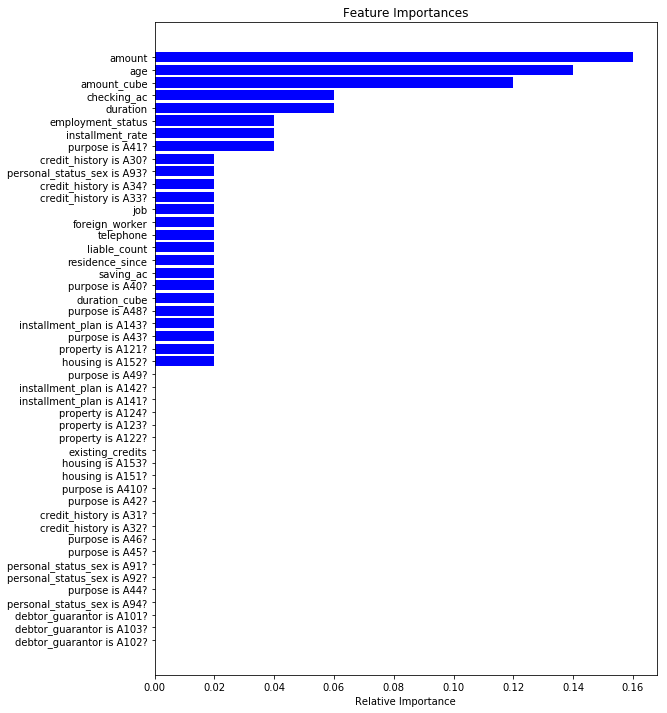

In [260]:
clf = AdaBoostClassifier()
clf.fit(X_train, y_train.values.ravel())
predict = clf.predict(X_val)
acc = accuracy_score(y_val, predict)
cnf_matrix = confusion_matrix(y_val, predict)
print("Accuracy on Validation Set: " + str(acc))
print("Confusion matrix for Validation Set")
print(cnf_matrix)
predict = clf.predict(X_test)
acc = accuracy_score(y_test, predict)
cnf_matrix = confusion_matrix(y_test, predict)
print("Accuracy on Test Set: " + str(acc))
print("Confusion matrix for Test Set")
print(cnf_matrix)
plot_features_clf(clf)

# Feature Engineering

In [261]:
z = X_train.amount.head()
z

908    8.187021
989    7.463363
382    7.156956
122    7.477604
136    9.061028
Name: amount, dtype: float64